In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
# Load CSV files into DataFrames
lab_value_df = pd.read_csv('lab_value.csv')
vital_value_df = pd.read_csv('vital_value.csv')
admission_df = pd.read_csv('admission.csv')
lab_value_label_df = pd.read_csv('lab_value_label.csv')
vital_value_label_df = pd.read_csv('vital_value_label.csv')


In [20]:
#data_paths = ["lab_value.csv", "vital_value.csv", "admission.csv","lab_value_label.csv","vital_value_label.csv"]
dataset = pd.concat(map(pd.read_csv, ['admission.csv','lab_value.csv', 'vital_value.csv', 'lab_value_label.csv', 'vital_value_label.csv']))
dataset

,patient_id,case_id,admission_time,discharge_time,patient_age,patient_height,patient_weight,e_type,e_reason,lab_value_label_id,sample_type_id,record_time,lab_value,unit_type_id,vital_value_label_id,vital_value,id,label_name,label_description
0,1066797.0,37033628.0,2017-01-03 11:40:00,2017-07-31 14:00:00,61.0,171.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2335739.0,37052363.0,2017-02-06 09:59:00,2017-03-14 16:19:00,82.0,160.0,88.0,V,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2323947.0,37058082.0,2017-03-27 10:04:00,2017-04-05 12:03:00,65.0,176.0,93.0,N,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1043682.0,37058380.0,2017-03-06 09:45:00,2017-03-16 10:40:00,35.0,172.0,117.0,N,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2338083.0,37064614.0,2017-01-27 12:37:00,2017-03-18 14:27:00,66.0,180.0,52.0,V,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,SPO2,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,T,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,RR (systolic),NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,RR (diastolic),NaN


TypeError: 'value' must be an instance of str or bytes, not a float

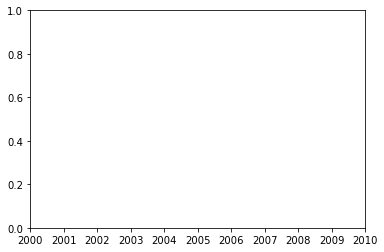

In [23]:
# Check for missing values in each column and handle them accordingly
dataset['admission_time'] = pd.to_datetime(dataset['admission_time'])
plt.plot(dataset['admission_time'], dataset['discharge_time'])
bytes_value = bytes(str(float_value), 'utf-8')